In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from fcmeans import FCM
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
data_headers = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv('E:\Документы/УЧЕБА/МАГА/1 семестр/Демидова/3_4/glass.data', names=data_headers)

# Предобработка данных

In [3]:
set(data.iloc[:,-1])

{1, 2, 3, 5, 6, 7}

In [4]:
data_without_classes = pd.DataFrame(data.iloc[:,1:-1])

In [5]:
data_without_classes

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [6]:
true_label = list(data.iloc[:,-1])

In [7]:
data_without_classes

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


# K-means

In [8]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=322).fit(data_without_classes)

In [9]:
kmeans.labels_

array([0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 5, 5, 5, 1, 1,
       5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 1, 1, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 4, 4, 1, 1, 4, 2, 2, 3, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [10]:
true_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7]

In [11]:
silhouette_score(data_without_classes, kmeans.labels_)

0.4519785341078629

In [12]:
from sklearn.manifold import TSNE
import seaborn as sns

## Оригинальные метки классов

In [13]:
tsne = TSNE(init='random', perplexity=10).fit_transform(data.iloc[:,1:-1])

C:\Users\shars\anaconda3\envs\demidova\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [14]:
df = pd.DataFrame()
df["y"] = data.iloc[:,-1]
df["comp-1"] = tsne[:,0]
df["comp-2"] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

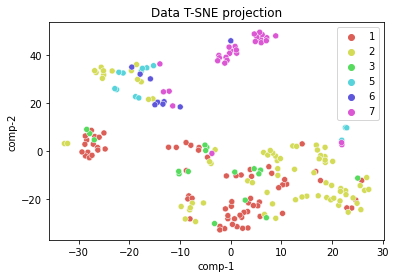

In [15]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title="Data T-SNE projection") 

## Новые метки классов

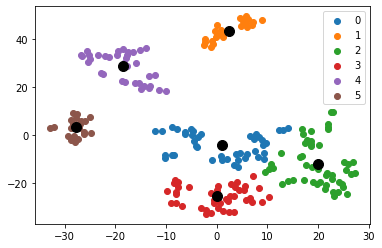

In [16]:
labels = kmeans.fit_predict(tsne)
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(tsne[labels == i , 0] , tsne[labels == i , 1] , label = i)
#Getting the Centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

In [17]:
sil = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=322).fit(data_without_classes)
    print("Silhouette score: num of clusters {} = {}".format(k, silhouette_score(data_without_classes, kmeans.labels_)))
    sil.append(silhouette_score(data_without_classes, kmeans.labels_))

Silhouette score: num of clusters 2 = 0.5606521011102594
Silhouette score: num of clusters 3 = 0.5822429516169841
Silhouette score: num of clusters 4 = 0.5806597565771918
Silhouette score: num of clusters 5 = 0.43607171299365655
Silhouette score: num of clusters 6 = 0.4519785341078629
Silhouette score: num of clusters 7 = 0.4589602818781681
Silhouette score: num of clusters 8 = 0.4574789515062205
Silhouette score: num of clusters 9 = 0.2825129787190708
Silhouette score: num of clusters 10 = 0.2846300729198249


Text(0.5, 1.0, 'Метод силуэта')

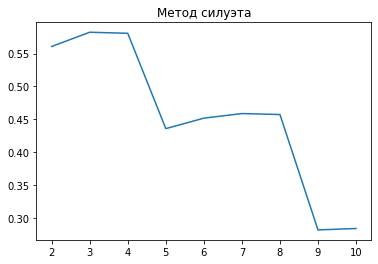

In [18]:
plt.plot(range(2, 11), sil)
plt.title("Метод силуэта")

После анализа графиков можно сделать вывод, что оптимальным количеством классов для выбранного датасета будет 4

In [19]:
len(true_label)

214

In [20]:
len(kmeans.labels_)

214

Text(0.5, 15.0, 'New label')

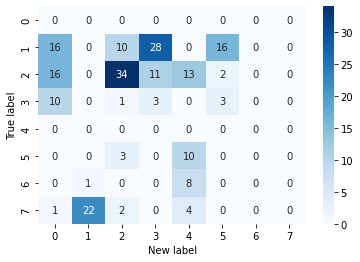

In [21]:
cm = confusion_matrix(true_label, labels)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('New label')

# FCM

In [22]:
fcm = FCM(n_clusters=6, random_state=322)
fcm.fit(np.array(data_without_classes))

In [23]:
fcm_labels = fcm.predict(np.array(data_without_classes))

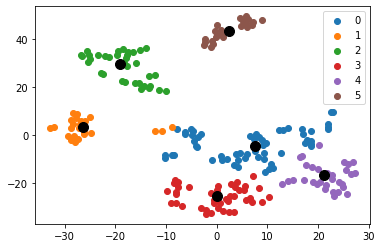

In [24]:
fcm = FCM(n_clusters=6)
fcm.fit(tsne)
labels = fcm.predict(tsne)
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(tsne[labels == i , 0] , tsne[labels == i , 1] , label = i)
#Getting the Centroids
centroids = fcm.centers
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

Text(0.5, 15.0, 'New label')

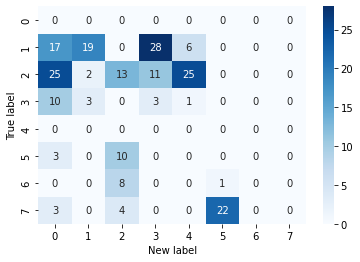

In [25]:
cm = confusion_matrix(true_label, labels)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('New label')

In [26]:
print("Silhouette score: {}".format(silhouette_score(data_without_classes, labels)))

Silhouette score: 0.14916934628890957


In [27]:
sil = []
for k in range(2,11):
    fcm = FCM(n_clusters=k, random_state=322)
    fcm.fit(np.array(data_without_classes))
    
    fcm_labels = fcm.predict(np.array(data_without_classes))
    print("Silhouette score: num of clusters {} = {}".format(k, silhouette_score(data_without_classes, fcm_labels)))
    sil.append(silhouette_score(data_without_classes, fcm_labels))

Silhouette score: num of clusters 2 = 0.5548566962789819
Silhouette score: num of clusters 3 = 0.4503846709725975
Silhouette score: num of clusters 4 = 0.3861516403957598
Silhouette score: num of clusters 5 = 0.34900673120046094
Silhouette score: num of clusters 6 = 0.24106532996879457
Silhouette score: num of clusters 7 = 0.2575558738197097
Silhouette score: num of clusters 8 = 0.2395546089492151
Silhouette score: num of clusters 9 = 0.24442784783969582
Silhouette score: num of clusters 10 = 0.1903584505124486


Text(0.5, 1.0, 'Метод силуэта')

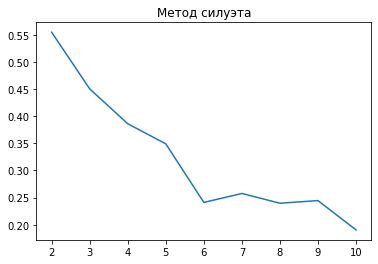

In [28]:
plt.plot(range(2, 11), sil)
plt.title("Метод силуэта")

После анализа графиков можно сделать вывод, что оптимальным количеством классов для выбранного датасета будет 5

# DBSCAN

## Определение Epsilon

In [29]:
nn = NearestNeighbors(n_neighbors=9).fit(data_without_classes)

In [30]:
d, _ = nn.kneighbors(data_without_classes, n_neighbors=9, return_distance=True)

In [31]:
d = d[:, -1]
d = np.sort(d)

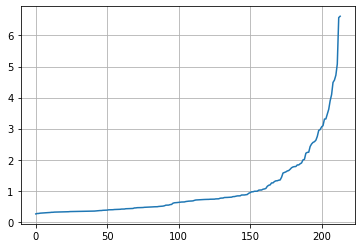

In [32]:
plt.plot(d)
plt.grid()

In [33]:
eps = 1.3

In [34]:
dbscan = DBSCAN(eps=eps).fit(data_without_classes)

In [35]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  0,  1,  0,  0,  0,  0, -1, -1,  1, -1, -1, -1, -1,
        0, -1, -1,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,
        2,  2,  2, -1,  2,  2,  2,  2,  2,  2], dtype=int64)

In [36]:
df = pd.DataFrame()
df["y"] = dbscan.labels_
df["comp-1"] = tsne[:,0]
df["comp-2"] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

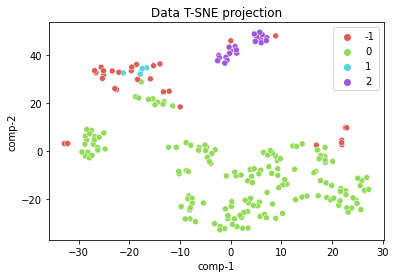

In [37]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="Data T-SNE projection") 

Text(0.5, 15.0, 'New label')

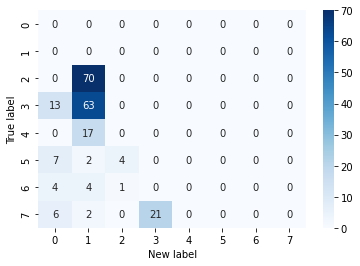

In [38]:
cm = confusion_matrix(true_label, dbscan.labels_)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('New label')

In [39]:
print("Silhouette score: {}".format(silhouette_score(data_without_classes, dbscan.labels_)))

Silhouette score: 0.5105290958626343


DBSCAN определил 4 метки класса (одна из которых шум), при вычисленном значении эпсилон 1.3, при этом индекс кластерного силуэта равен 0.51

# Вывод

В результате проведенной работы можно сделать вывод, что для данного набора данных лучше всего подходит KMeans, так как он лучше всего показывает оценку кластерного силуэта **при 6 кластерах = 0.4519785341078629**.<br>Но также выигрывает другие алгоритмы с уменьшением количества кластеров, так при 4 метках класса<br>KMeans показывает оценку = **0.5806597565771918**,<br>что больше чем в FCM = **0.3861516403957598**,<br>а также DBSCAN = **0.5105290958626343**